3.0102774232186076 2.9006853697560135


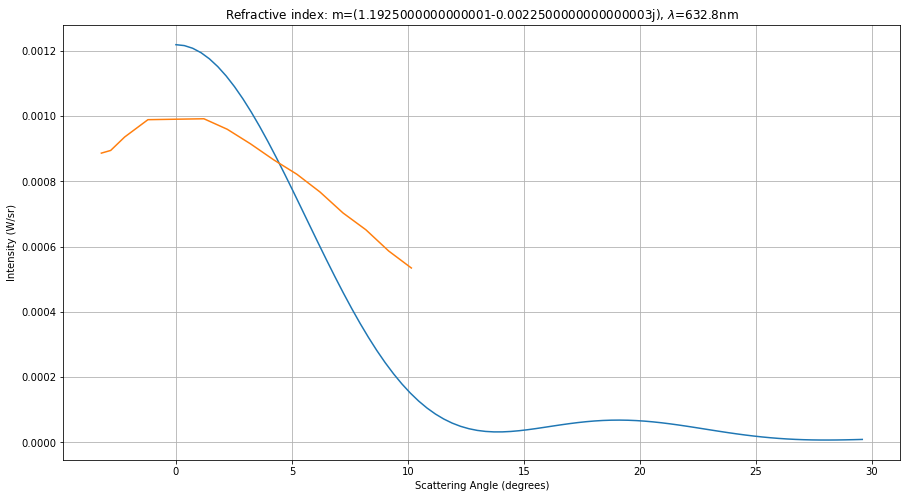

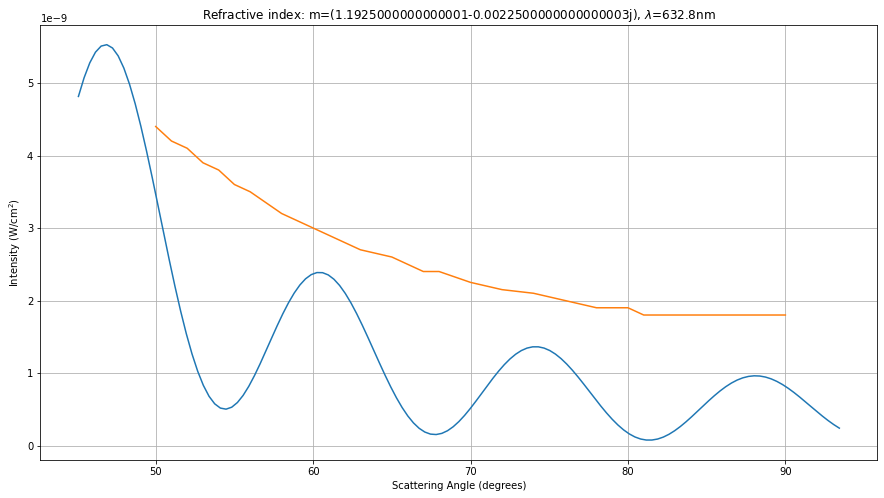

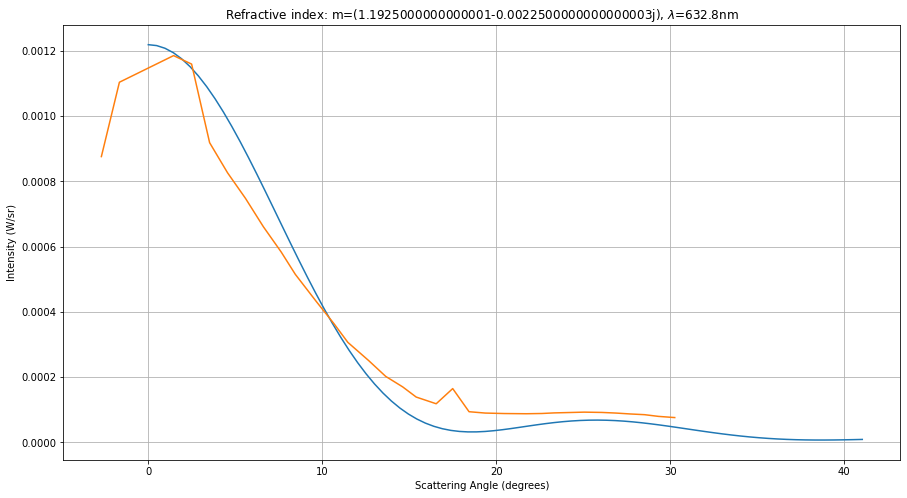

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import miepython as mp
#----REFFRACTION INDEX------
n_env=4/3 #indice di rifrazione mezzo non assorbente in cui sono immerse la sfere
m = (1.59-0.003j)/n_env #indice di rifrazione sfere/indice di rifrazione ambiente
#distanza campione-detector= 29.5 cm +-0.5cm
#albedo tot= 4.76mW (dovrei togliere R^2 direi)
#----WAVE AND PARTICLES-----
lambda0 = 632.8e-9 /n_env  # [m]  lunghezza d'onda/indice rifraz ambiente
d = 2100e-9        # [m]  diametro sfera
x = 2*np.pi*d/2 /lambda0 #relative size parameter
#---------------------------
R=28.5 #distanza campione-detector [cm^2]
P_tot=1*10**-4 #ptotale misurata DOPO SCATTERING
#a=P_tot/R**2 #albedo [W/cm^2]
#---------------------------
theta = np.linspace(0,180,500) #angolo theta rispetto a z asse incidente
mu = np.cos(theta* np.pi/180)  #coseno dell'angolo
geometric_cross_section = np.pi * d**2/4 * 1e4  # [cm**2] sezione d'urto geometrica (normalizzaz. delle sez d'urto)
#scattering efficiencies: extintion(tot), scattered, backscattered, anisotropy? Q=sigma/pi*R^2
qext, qsca, qback, g = mp.mie(m,x)
print(qext,qsca)
sigma_sca = geometric_cross_section * qsca * mp.i_per(m,x,mu) #[area]*[]*[1/sr]

'''
plt.figure(figsize=(15,8))
plt.semilogy(theta, sigma_sca, color='blue')
#plt.text(15, sigma_sca[0]*3e-4, "%.0fnm\n(x10$^{-3}$)" % (d*1e9), color='blue')

plt.title('Refractive index: m='+str(m)+', $\lambda$='+str(round(lambda0*n_env*10**9, 1))+'nm')
plt.xlabel("Scattering Angle (degrees)")
plt.ylabel("Diff. Scattering Cross Section (cm$^2$/sr)")
plt.grid(True)
plt.show()
'''

'''
plt.figure(figsize=(15,8))
plt.plot(theta[0:int(len(theta)/6)], P_tot*mp.i_per(m,x,mu[0:int(len(theta)/6)])/R**2)
h=np.array([3.7,4.7,4.8,5.2,5.5,5.8,6.2,7.2,8.2,9.2,10.2,11.2,12.2,13.2,14.2])
h=np.arctan((h-5.5)/28.5)*180/np.pi
Int=np.array([2.85,11.29,22.2,834,867,7.54,7.69,2.29,1.42,0.92,0.62,0.42,0.27,0.23,0.19])*10**-6
plt.plot(h,Int)
plt.title('Refractive index: m='+str(m)+', $\lambda$='+str(round(lambda0*n_env*10**9, 1))+'nm')
plt.xlabel("Scattering Angle (degrees)")
plt.ylabel("Intensity (W/cm$^2$)")
plt.grid(True)
plt.show()
'''

plt.figure(figsize=(15,8))
plt.plot(theta[0:int(len(theta)/6)], P_tot *mp.i_per(m,x,mu[0:int(len(theta)/6)]) )
#h=np.array([3.7,4.7,4.8,5.2,5.5,5.8,6.2,7.2,8.2,9.2,10.2,11.2,12.2,13.2,14.2])
h=np.array([3.6,3.8,4.1,4.6,5.8,6.3,6.8,7.3,7.8,8.3,8.8,9.3,9.8,10.3])
h=np.arctan((h-5.2)/28.5) *180/np.pi
Int=np.array([9.1,9.15,9.52,9.98,9.86,9.5,9.03,8.53,8.09,7.56,6.94,6.45,5.83,5.34])*10**-6 *np.cos(np.arctan((h-5.2)/28.5)) *R**2 /8
plt.plot(h,Int)
plt.title('Refractive index: m='+str(m)+', $\lambda$='+str(round(lambda0*n_env*10**9, 1))+'nm')
plt.xlabel("Scattering Angle (degrees)")
plt.ylabel("Intensity (W/sr)")
plt.grid(True)
plt.show()

plt.figure(figsize=(15,8))
xplt=theta[          int(len(theta)*0.25) : int(len(theta)*0.52) ]
yplt=mp.i_per(m, x, mu[ int(len(theta)*0.25) : int(len(theta)*0.52) ])
plt.plot(xplt, P_tot* yplt /R**2)
#h=np.array([3.7,4.7,4.8,5.2,5.5,5.8,6.2,7.2,8.2,9.2,10.2,11.2,12.2,13.2,14.2])
tt1=np.arange(50,68 +1)
tt3=np.arange(80,90 +1)
tt2=np.arange(70,78 +1,2)
tt=np.concatenate((tt1,tt2,tt3))
Int1=np.array([0.44,0.42,0.41,0.39,0.38,0.36,0.35,0.335,0.32,0.31,0.3,0.29,0.28,0.27,0.265,0.26,0.25,0.24,0.24,0.225,0.215,0.21,0.2,0.19,0.19])
Int2=np.ones(10)*0.18
Int=np.concatenate((Int1,Int2)) *10**-6 /100
plt.plot(tt,Int)
plt.title('Refractive index: m='+str(m)+', $\lambda$='+str(round(lambda0*n_env*10**9, 1))+'nm')
plt.xlabel("Scattering Angle (degrees)")
plt.ylabel("Intensity (W/cm$^2$)")
plt.grid(True)
plt.show()

plt.figure(figsize=(15,8))
plt.plot(np.arcsin(1.33*np.sin(theta[0:int(len(theta)/6)]*np.pi/180)) *180/np.pi, P_tot *mp.i_per(m,x,mu[0:int(len(theta)/6)]) )
#h=np.array([3.7,4.7,4.8,5.2,5.5,5.8,6.2,7.2,8.2,9.2,10.2,11.2,12.2,13.2,14.2])
h=np.array([3.9,4.4,5.9,6.4,6.9,7.4,7.9,8.4,8.9,9.3,9.9,10.4,10.8,11.4,11.9,12.4,12.8,13.4,13.9,14.4,14.9,15.5,16.2,16.7,17.1,17.6,18.1,18.7,19.2,19.7,20.2,20.7,21.3])
Int=np.array([18.03,22.6,23.8,23.1,18.15,16.18,14.51,12.7,11.1,9.71,8.02,6.69,5.58,4.5,3.58,2.97,2.40,2.01,2.76,1.55,1.46,1.41,1.37,1.36,1.37,1.365,1.36,1.32,1.27,1.21,1.16,1.07,1])*10**-6 / (1/(27.6**2+h**2)) /16
h=np.arctan((h-5.2)/27.6) *180/np.pi
plt.plot(h,Int)
plt.title('Refractive index: m='+str(m)+', $\lambda$='+str(round(lambda0*n_env*10**9, 1))+'nm')
plt.xlabel("Scattering Angle (degrees)")
plt.ylabel("Intensity (W/sr)")
plt.grid(True)
plt.show()

In [ ]:
#particelle di altre dimensioni
d = 170e-9         # m
x = 2 * np.pi/lambda0 * d/2
geometric_cross_section = np.pi * d**2/4 * 1e4  # cm**2
qext, qsca, qback, g = mp.mie(m,x)
sigma_sca = geometric_cross_section * qext * mp.i_unpolarized(m,x,mu)
plt.semilogy(theta, sigma_sca, color='red')
plt.text(110, sigma_sca[-1]/2, "%.0fnm" % (d*1e9), color='red')

d = 17e-9                                                       # m
x = 2 * np.pi/lambda0 * d/2
geometric_cross_section = np.pi * d**2/4 * 1e4                 # cm**2
qext, qsca, qback, g = mp.mie(m,x)
sigma_sca = geometric_cross_section * qext * mp.i_unpolarized(m,x,mu)
plt.semilogy(theta, sigma_sca*1e6, color='green')
plt.text(130, sigma_sca[-1]*1e6, "(x10$^6$)\n%.0fnm" % (d*1e9), color='green')

In [ ]:
#multiple scatterers
m = 1.5
x = np.pi/3
theta = np.linspace(-180,180,1800)
mu = np.cos(theta/180*np.pi)
s1,s2 = mp.mie_S1_S2(m,x,mu)
scat = 5*(abs(s1)**2+abs(s2)**2)/2  #unpolarized scattered light

N=13
xx = 3.5 * np.random.rand(N, 1) - 1.5
yy = 5 * np.random.rand(N, 1) - 2.5

plt.scatter(xx,yy,s=40,color='red')
for i in range(N):
    plt.plot(scat*np.cos(theta/180*np.pi)+xx[i],scat*np.sin(theta/180*np.pi)+yy[i],color='red')

plt.plot([-5,7],[0,0],':k')

plt.annotate('incoming\nirradiance', xy=(-4.5,-2.3),ha='left',color='blue',fontsize=14)
for i in range(6):
    y0 = i -2.5
    plt.annotate('',xy=(-1.5,y0),xytext=(-5,y0),arrowprops=dict(arrowstyle="->",color='blue'))

plt.annotate('unscattered\nirradiance', xy=(3,-2.3),ha='left',color='blue',fontsize=14)
for i in range(6):
    y0 = i -2.5
    plt.annotate('',xy=(7,y0),xytext=(3,y0),arrowprops=dict(arrowstyle="->",color='blue',ls=':'))

#plt.annotate('scattered\nspherical\nwave', xy=(0,1.5),ha='left',color='red',fontsize=16)
#plt.annotate('',xy=(2.5,2.5),xytext=(0,0),arrowprops=dict(arrowstyle="->",color='red'))
#plt.annotate(r'$\theta$',xy=(2,0.7),color='red',fontsize=14)
#plt.annotate('',xy=(2,2),xytext=(2.7,0),arrowprops=dict(connectionstyle="arc3,rad=0.2", arrowstyle="<->",color='red'))

plt.xlim(-5,7)
plt.ylim(-3,3)
plt.axis('off')
plt.show()

In [ ]:
#frazione di albedo su tutto l'angolo solido (se la parte immaginaria di m è zero questa dev'esere 1)
#albedo: potenza P0 che arriva sullo scatteratore
m = 1.5 - 1.5j
x = 1
mu = np.linspace(-1,1,501)
intensity = miepython.i_unpolarized(m,x,mu)
qext, qsca, qback, g = miepython.mie(m,x)
a = qsca/qext

#integrate over all angles
dmu = mu[1] - mu[0]
total = 2 * np.pi * dmu * np.sum(intensity)

plt.plot(mu,intensity)
plt.xlabel(r'$\cos(\theta)$')
plt.ylabel('Unpolarized Scattering Intensity [1/sr]')
plt.title('m=%.3f%+.3fj, x=%.2f, a=%.3f, total=%.3f'%(m.real,m.imag,x,a, total))
plt.show()

In [7]:
import numpy as np
print(2*np.arctan(1/2/9)*180/np.pi)
print(np.arctan(1/28.5)*180/np.pi)

6.359660239728468
2.009553813021139
